# **DL Assignment 4 - Question2**
## **DL Group 215**
###Nareskumar P (2020FC04122),
###Kommajyosula VNS Kanth (2020FC04120),
###Tejesh Dola (2020FC04459)

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
from google.colab import drive
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Embedding
from tensorflow.python.keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.

In [2]:
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  
dataset= pd.read_csv('gdrive/My Drive/data1_0.2.csv', encoding='latin-1')

Mounted at /content/gdrive


###Data Validation

In [3]:
dataset.head()

,0.045999539,-0.18176747,0
0,-0.516146,0.210068,0
1,0.246368,-0.514901,0
2,-0.176004,0.538347,0
3,-0.540533,0.239300,0
4,-0.493781,-0.339981,0


Could see two features and one classifier in the dataset

In [4]:
tf.test.gpu_device_name()

''

In [5]:
#Assigning column names
dataset.columns =['feature1', 'feature2', 'classifier']

In [6]:
dataset.describe()

,feature1,feature2,classifier
count,764.000000,764.000000,764.000000
mean,0.025005,-0.006135,0.418848
std,0.480714,0.499429,0.493694
min,-0.996726,-0.999604,0.000000
25%,-0.351179,-0.420132,0.000000
50%,0.028465,-0.005979,0.000000
75%,0.404878,0.382846,1.000000
max,0.953268,0.984892,1.000000


In [7]:
dataset.classifier.unique()

array([0, 1])

Only two unique classes are present in the classifier

In [8]:
dataset.loc[dataset['classifier'] == 0]

,feature1,feature2,classifier
0,-0.516146,0.210068,0
1,0.246368,-0.514901,0
2,-0.176004,0.538347,0
3,-0.540533,0.239300,0
4,-0.493781,-0.339981,0
...,...,...,...
439,0.081769,0.809590,0
440,-0.308407,0.806917,0
441,-0.474379,0.784835,0
442,0.715742,-0.590735,0


In [9]:
dataset.loc[dataset['classifier'] == 1]

,feature1,feature2,classifier
444,0.702478,0.127961,1
445,0.640130,-0.281620,1
446,-0.429982,-0.581259,1
447,-0.149910,-0.645058,1
448,0.684375,0.164741,1
...,...,...,...
759,0.218472,0.184996,1
760,-0.097992,-0.302559,1
761,-0.236467,0.212870,1
762,0.745290,-0.210026,1


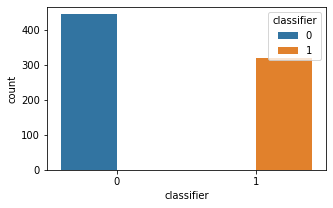

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
sns.countplot(data=dataset, x='classifier', hue='classifier')
plt.show()

In [11]:
dataset.shape

(764, 3)

In [12]:
#Assigning features columns to x and classifier columns to y
x = dataset.drop(['classifier'], axis=1)
y = dataset['classifier']

In [13]:
x.head

<bound method NDFrame.head of      feature1  feature2
0   -0.516146  0.210068
1    0.246368 -0.514901
2   -0.176004  0.538347
3   -0.540533  0.239300
4   -0.493781 -0.339981
..        ...       ...
759  0.218472  0.184996
760 -0.097992 -0.302559
761 -0.236467  0.212870
762  0.745290 -0.210026
763  0.248667  0.218322

[764 rows x 2 columns]>

In [14]:
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
759    1
760    1
761    1
762    1
763    1
Name: classifier, Length: 764, dtype: int64>

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved.

In [15]:
#Splitting the data into training and testing in 70:30 ratio.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)


In [16]:
ytrain.value_counts(), ytest.value_counts()

(0    310
 1    224
 Name: classifier, dtype: int64, 0    134
 1     96
 Name: classifier, dtype: int64)

##Model Building

In [17]:
model=Sequential()
model.add(Dense(4,input_dim=2, activation='relu',kernel_regularizer = regularizers.l2(0.0001))) #Input layer #using l2 regularizer to assign compressed weights
model.add(Dense(8,activation='relu')) #Hidden layer
model.add(Dense(12,activation='relu')) #Hidden layer
model.add(Dropout(0.3)) # Added dropout to introduce more randomness
model.add(Dense(16,activation='relu')) #Hidden layer 
model.add(Dense(1,activation='sigmoid')) #ouptut layer, Using sigmoid since its a binary output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable pa

In [18]:
xtrain.head

<bound method NDFrame.head of      feature1  feature2
65   0.002964 -0.092039
414 -0.445750 -0.883797
194  0.591415  0.598393
630  0.374065  0.679751
58   0.123803  0.016378
..        ...       ...
312 -0.863169  0.023720
440 -0.308407  0.806917
179 -0.578008  0.778017
81  -0.341317 -0.456833
433 -0.811821 -0.015052

[534 rows x 2 columns]>

##Model Compiling and Training

In [19]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#since we are having binary classifier hence using binary_crossentropy loss function

In [20]:
history = model.fit(xtrain,ytrain,epochs=20,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/20
17/17 [==============================] - 1s 20ms/step - loss: 0.6924 - accuracy: 0.5524 - val_loss: 0.6881 - val_accuracy: 0.5826
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5674 - val_loss: 0.6843 - val_accuracy: 0.5826
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5787 - val_loss: 0.6810 - val_accuracy: 0.5826
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6788 - accuracy: 0.5805 - val_loss: 0.6782 - val_accuracy: 0.5826
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.5805 - val_loss: 0.6762 - val_accuracy: 0.5826
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.5805 - val_loss: 0.6756 - val_accuracy: 0.5826
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.5805 - val_loss: 0.6752 - val_accuracy: 0.5826
Epoch 8/20
17/17 [=

##Model Evaluation

In [21]:
loss, accuracy = model.evaluate(xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xtest, ytest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5805
Testing Accuracy:  0.5826


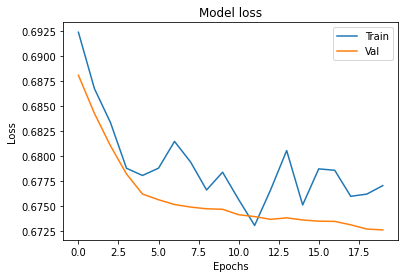

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

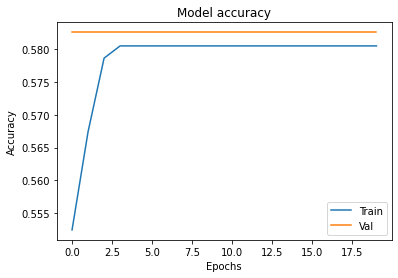

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results.

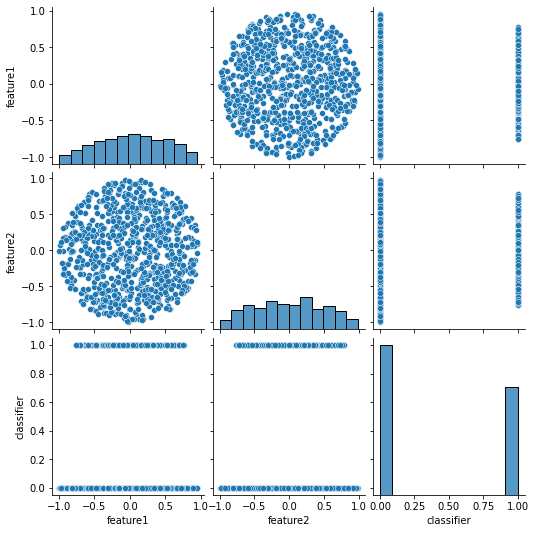

In [24]:
sns.pairplot(dataset)

No relation between features hence extracting new feature by adding two dataset values

In [25]:
dataset['feature1'].describe()

count    764.000000
mean       0.025005
std        0.480714
min       -0.996726
25%       -0.351179
50%        0.028465
75%        0.404878
max        0.953268
Name: feature1, dtype: float64

Could see the feature1 have values between -1 and 1

In [26]:
dataset['feature2'].describe()

count    764.000000
mean      -0.006135
std        0.499429
min       -0.999604
25%       -0.420132
50%       -0.005979
75%        0.382846
max        0.984892
Name: feature2, dtype: float64

Could see the feature2 have values between -1 and 1

In [27]:
import numpy as np
import pandas as pd

#Since the both feature 1 and feature 2 have values between -1 and 1 hence binning the numerical values and converting it into categorical data by using below template
#-1 to -0.9 -> Label A
#-0.9 to -0.8 -> Label B
#-0.8 to -0.7 -> Label C
#-0.7 to -0.6 -> Label D
#-0.6 to -0.5 -> Label E
#-0.5to -0.4 -> Label F
#-0.4 to -0.3 -> Label G
#-0.3 to -0.2 -> Label H
#-0.2 to -0.1 -> Label I
#-0.1 to 0.0 -> Label J
#0.0 to 0.1 -> Label K
#0.1 to 0.2 -> Label L
#0.2 to 0.3 -> Label M
#0.3 to 0.4 -> Label N
#0.4 to 0.5 -> Label O
#0.5 to 0.6 -> Label P
#0.6 to 0.7 -> Label Q
#0.7 to 0.8 -> Label R
#0.8 to 0.9 -> Label S
#0.9 to Infinity -> Label T

#Converting both featues numerical data to categorical data
dataset['binned_feature1'] = pd.cut(dataset.feature1, bins=[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, np.inf], include_lowest=False, right=True, labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])
dataset['binned_feature2'] = pd.cut(dataset.feature2, bins=[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, np.inf], include_lowest=False, right=True, labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])

#Deriving a new feature by concatenating two categorical data of feature1 and feature2
dataset['derived_feature'] = dataset['binned_feature1'].astype(str) + dataset['binned_feature2'].astype(str)
dataset['derived_feature']

0      EM
1      ME
2      IP
3      EM
4      FG
       ..
759    ML
760    JG
761    HM
762    RH
763    MM
Name: derived_feature, Length: 764, dtype: object

In [28]:
dataset['derived_feature'].astype(str)

0      EM
1      ME
2      IP
3      EM
4      FG
       ..
759    ML
760    JG
761    HM
762    RH
763    MM
Name: derived_feature, Length: 764, dtype: object

In [29]:
#Encoding the derived feature since it has categorical string data
from sklearn.preprocessing import LabelBinarizer
x = LabelBinarizer().fit_transform(dataset.derived_feature)
y = dataset['classifier']
#Splitting the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=42)

In [30]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((573, 301), (191, 301), (573,), (191,))

In [32]:
input_size=xtrain.shape[1]

##Building Model 2

Creating the minimal network since we have only one derived input

In [33]:
model2=Sequential()
#l2 regularization is also one of the feature selection hence used l2 regularization here
model2.add(Dense(4,input_shape=(input_size,), activation='relu',kernel_regularizer = regularizers.l2(0.0001))) #Input layer
model2.add(Dense(16,activation='relu')) #Hidden layer
model2.add(Dense(1,activation='sigmoid')) #ouptut layer, Using sigmoid since its a binary output
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 1208      
                                                                 
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


##Model 2 Compiling and Training

In [34]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history2 = model2.fit(xtrain,ytrain,epochs=20,batch_size=50,validation_data=(xtest,ytest))

Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 0.6931 - accuracy: 0.5340 - val_loss: 0.6910 - val_accuracy: 0.5969
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5742 - val_loss: 0.6874 - val_accuracy: 0.6073
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5724 - val_loss: 0.6833 - val_accuracy: 0.6073
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6835 - accuracy: 0.5724 - val_loss: 0.6788 - val_accuracy: 0.6073
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.5724 - val_loss: 0.6749 - val_accuracy: 0.6073
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6738 - accuracy: 0.5724 - val_loss: 0.6699 - val_accuracy: 0.6073
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6670 - accuracy: 0.5724 - val_loss: 0.6641 - val_accuracy: 0.6073
Epoch 8/20
12/12 [=

##Model 2 Evaluation

In [36]:
loss, accuracy = model2.evaluate(xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(xtest, ytest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9302
Testing Accuracy:  0.8586


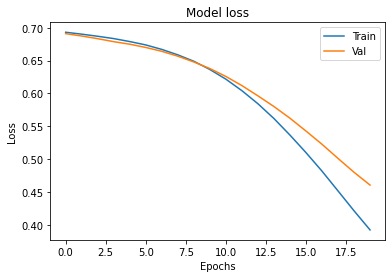

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

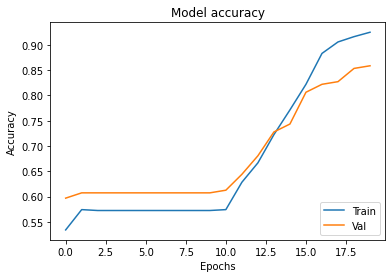

In [38]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
y_pred_new = model2.predict(xtest)
y_pred_nn = np.where(y_pred_new>0.5,1,0)
print("Accuracy:\n", accuracy_score(ytest, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_nn))
print("Classification Report:\n", classification_report(ytest, y_pred_nn))

Accuracy:
 0.8586387434554974
Confusion Matrix:
 [[114   2]
 [ 25  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       116
           1       0.96      0.67      0.79        75

    accuracy                           0.86       191
   macro avg       0.89      0.82      0.84       191
weighted avg       0.88      0.86      0.85       191



**Conclusion:**

For Model1, we have used two feautures and build the model with 3 hidden layers. The accuracy for the model1 is around 60%.

For Model2, we have derived a new feature using the two features (using binning method) and build the model with only one hidden layer since we have only one feature in the training data. The accuracy for the model2 is around 86%.

Hence minimizing the network helps to improve the accuracy of the model. So we are concluding that Model2 is better than Model1